In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('../set_train_simple/eqtype_train_test15k_.csv')

from sklearn.model_selection import train_test_split

train, test = train_test_split(df.copy(), test_size=(1/3), random_state=0)

In [2]:
train

,date,titre,type
12838,2018-05-22,Les zones d'ombre du code source de Parcoursup,science
4772,2018-06-25,"Oscar Vela (Elior Group), Serge Morelli (Axa),...",actu
5342,2017-04-24,François Fillon dénonce un acharnement des Fra...,parodique
9333,2019-04-16,Un passeport syrien en parfait état retrouvé d...,parodique
6499,2018-01-15,Balle aux prisonniers : Il réapprend à vivre d...,parodique
...,...,...,...
13123,2017-11-13,L'Esma avertit qu'une cryptomonnaie peut perdr...,science
3264,2020-06-25,Elizabeth II : ce geste de François Hollande q...,people
9845,2019-02-17,Carlos Ghosn dénonce: « Je n’ai jamais rien vo...,parodique
10799,2020-07-13,"Photos: Enora Malagré, Nikos Aliagas, Karine L...",people


In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))

train['titre']= train['titre'].astype(str)

from nltk.tokenize import RegexpTokenizer
import re 

tokenizer = RegexpTokenizer(r'\w+') 

liste_tok2 = []
for titre in train['titre']:


    words = tokenizer.tokenize(re.sub('[0-9]+', '', titre.lower()))

    #new_words = list( set(words) - stop_words)   #=>
    new_words = [word for word in words if word not in stop_words]
    liste_tok2.append(new_words)
    
#imdb_data['tokkens'] = liste_tok
train['tokken2']=liste_tok2

In [4]:
pd.options.display.max_colwidth = 200

In [5]:
train[['titre','tokken2']]

,titre,tokken2
12838,Les zones d'ombre du code source de Parcoursup,"[zones, ombre, code, source, parcoursup]"
4772,"Oscar Vela (Elior Group), Serge Morelli (Axa), Olivier Theulle (Fnac Darty)","[oscar, vela, elior, group, serge, morelli, axa, olivier, theulle, fnac, darty]"
5342,François Fillon dénonce un acharnement des Français à son encontre,"[françois, fillon, dénonce, acharnement, français, encontre]"
9333,Un passeport syrien en parfait état retrouvé dans les décombres des 2 tours de Notre-Dame,"[passeport, syrien, parfait, état, retrouvé, décombres, tours, dame]"
6499,Balle aux prisonniers : Il réapprend à vivre doucement après son passage en prison,"[balle, prisonniers, réapprend, vivre, doucement, après, passage, prison]"
...,...,...
13123,L'Esma avertit qu'une cryptomonnaie peut perdre toute sa valeur,"[esma, avertit, cryptomonnaie, peut, perdre, toute, valeur]"
3264,Elizabeth II : ce geste de François Hollande qui l'a énormément vexée pendant un dîner d'Etat,"[elizabeth, ii, geste, françois, hollande, a, énormément, vexée, pendant, dîner, etat]"
9845,Carlos Ghosn dénonce: « Je n’ai jamais rien volé à Renaud »,"[carlos, ghosn, dénonce, jamais, rien, volé, renaud]"
10799,"Photos: Enora Malagré, Nikos Aliagas, Karine Le Marchand, la transformation physique de 22 animateurs !","[photos, enora, malagré, nikos, aliagas, karine, marchand, transformation, physique, animateurs]"


In [6]:
#idem test
stop_words = set(stopwords.words('french'))

test['titre']= test['titre'].astype(str)


tokenizer = RegexpTokenizer(r'\w+') 

liste_tok2 = []
for titre in test['titre']:


    words = tokenizer.tokenize(re.sub('[0-9]+', '', titre.lower()))

    #new_words = list( set(words) - stop_words)   #=>
    new_words = [word for word in words if word not in stop_words]
    liste_tok2.append(new_words)
    
#imdb_data['tokkens'] = liste_tok
test['tokken2']=liste_tok2

In [7]:
vocabulaire_train = list(set([item for sublist in train['tokken2'] for item in sublist]))

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
#sur corpus train
corpus = list(train['titre'])
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulaire_train))]).fit(corpus)
#matrice entrainement
tab = pipe['count'].transform(corpus).toarray()
df_mod = pd.DataFrame(tab , columns = vocabulaire_train)
#gestion memoire
del pipe
del tab
del corpus

In [8]:
df_mod.head()

,émus,horrible,croissants,raffinés,énormément,venaient,passer,tiananmen,croiss,julian,...,interdits,déporter,moss,répond,vivante,risqué,exercice,alcoolisée,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
len(list(set([item for sublist in test['tokken2'] for item in sublist])))

11470

In [10]:
#idem_test
vocabulaire_test = list(set([item for sublist in test['tokken2'] for item in sublist]))
print(len(vocabulaire_test))
vocabulaire_test = list(set(vocabulaire_train) - ( set(vocabulaire_train)-set(vocabulaire_test)))

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
#sur corpus train
corpus = list(test['titre'])
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulaire_test))]).fit(corpus)
#matrice entrainement
tab = pipe['count'].transform(corpus).toarray()
df_mod_test = pd.DataFrame(tab , columns = vocabulaire_test)
#gestion memoire
del pipe
del tab
del corpus

11470


In [11]:
df_mod_test

,passer,julian,ouverte,sociales,exclusive,urinoir,haters,directeur,jette,lâche,...,touche,ceux,particules,arbitrage,engagements,crue,moss,répond,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_mod.shape

(10000, 17103)

In [13]:
df_mod_test.shape

(5000, 7251)

In [14]:
df_mod.columns.difference(df_mod_test.columns).append(df_mod_test.columns)

Index(['ab', 'abandonnent', 'abandonnez', 'abattus', 'abba', 'abdelghani',
       'abdellah', 'abdelslam', 'abdennour', 'aberdeen',
       ...
       'touche', 'ceux', 'particules', 'arbitrage', 'engagements', 'crue',
       'moss', 'répond', 'réchauffe', 'champs'],
      dtype='object', length=17103)

In [15]:
df_mod_test = df_mod_test.reindex(columns=list(df_mod.columns.difference(df_mod_test.columns).append(df_mod_test.columns)), fill_value=0)

In [16]:
df_mod_test[:5]

,ab,abandonnent,abandonnez,abattus,abba,abdelghani,abdellah,abdelslam,abdennour,aberdeen,...,touche,ceux,particules,arbitrage,engagements,crue,moss,répond,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_mod[:5]

,émus,horrible,croissants,raffinés,énormément,venaient,passer,tiananmen,croiss,julian,...,interdits,déporter,moss,répond,vivante,risqué,exercice,alcoolisée,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_mod_test['andré'].value_counts()

0    4999
1       1
Name: andré, dtype: int64

In [19]:
df_mod_test = df_mod_test[df_mod.columns] #==> Memory Error possible


In [20]:
df_mod_test[:2]

,émus,horrible,croissants,raffinés,énormément,venaient,passer,tiananmen,croiss,julian,...,interdits,déporter,moss,répond,vivante,risqué,exercice,alcoolisée,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_mod[:2]

,émus,horrible,croissants,raffinés,énormément,venaient,passer,tiananmen,croiss,julian,...,interdits,déporter,moss,répond,vivante,risqué,exercice,alcoolisée,réchauffe,champs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train = df_mod
y_train = train['type']

X_test = df_mod_test
y_test = test['type']

In [65]:
#for 

sumdf_test= df_mod_test.sum(axis=1)


In [66]:
#moy valeur somme vecteur
sumdf_test.sum(axis=0)/len(sumdf_test)

5.4904

In [67]:
df_mod_test2 = df_mod_test.copy()

In [68]:
df_mod_test2.columns

Index(['bisphénols', 'liane', 'nazies', 'danser', 'champs', 'bong',
       'arrêtaient', 'wtf', 'méthane', 'space',
       ...
       'itv', 'bâtisseuses', 'choisissez', 'squelettes', 'apprenantes',
       'macula', 'lien', 'azincourt', 'doria', 'amoureuse'],
      dtype='object', length=17103)

In [69]:
for feature in df_mod_test2.columns:
       df_mod_test2[feature] = np.where((df_mod_test2[feature] > 0),1,df_mod_test2[feature])
#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)


In [70]:
#nombre moyen de composante du vecteur n'étant pas nulle
sumdf_test= df_mod_test2.sum(axis=1)
sumdf_test.sum(axis=0)/len(sumdf_test)

5.4598

In [71]:
#Model linéaire simple

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix , accuracy_score


clf = CategoricalNB()
clf.fit(X_train, y_train)


y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.8815


In [72]:
cm_train

array([[1461,   33,   30,  323,  119],
       [  47, 1684,   50,  134,   71],
       [  16,   68, 1856,   57,    9],
       [   5,    7,    4, 1988,   19],
       [  34,   13,    7,  139, 1826]], dtype=int64)

In [73]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

IndexError: index 2 is out of bounds for axis 1 with size 2

In [74]:
X_train['frontières'].value_counts()[1]

4

In [75]:
mot_non_gardés = []
for mot in X_train.columns:
    if len(X_train[str(mot)].value_counts()) == 1:
        print(mot)
        mot_non_gardés.append(mot)

z
f
tf
ɲ
ø
èmes
e
lvda
x
ç
mb
erministre
brca
system
cm
a
u
ţ
i
p
º
ème
g
o
ere
v
k
djr
ep
r
h
b


In [76]:
for mot in mot_non_gardés:
    if len(X_test[mot].value_counts()) > 1:
        print(X_test[mot].value_counts())

0    4999
1       1
Name: ep, dtype: int64


In [77]:
X_test

,bisphénols,liane,nazies,danser,champs,bong,arrêtaient,wtf,méthane,space,...,itv,bâtisseuses,choisissez,squelettes,apprenantes,macula,lien,azincourt,doria,amoureuse
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#nb moy de token train
n = 0
nn = 0
for tok in train['tokken2']:
    n +=len(tok) #nombre de tokken en moy par titre
    nn += len(set(tok)) #nombre de tokken différents en moy par titre
print(n/len(train),nn/len(train))

6.5277 6.4866


In [79]:
X_train['z'].value_counts()

0    10000
Name: z, dtype: int64

In [80]:
'z' in vocabulaire_train

True

In [81]:
#certains éléments / mot du vocabualire ne sont pas pris en compte !!!!! ==> diff sklearn / nltk tokkenisation
voca = ['z','bonjour','lala','ç', ' yrtry', 'carapuce', 'ep', 'éme']
t = ['bonjour z',"c'est géniale",'ç est un c', 'lala', 'yrtry z carapuce ep',"2éme ep. z"]
corpus = t
pipe = Pipeline([('count', CountVectorizer(vocabulary=voca))]).fit(corpus)
#matrice entrainement
tab = pipe['count'].transform(corpus).toarray()
pd.DataFrame(tab , columns = voca)

,z,bonjour,lala,ç,yrtry,carapuce,ep,éme
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,1,0
5,0,0,0,0,0,0,1,0


In [82]:
#reteste avec suppression mot non recensés ==> toujours pas....
X_train = df_mod.drop(mot_non_gardés,1)
y_train = train['type']

X_test = df_mod_test.drop(mot_non_gardés,1)
y_test = test['type']

In [83]:
clf = CategoricalNB()
clf.fit(X_train, y_train)


y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.8815


In [84]:
#Erreur algo sklearn? ==> attention, categoricalNB!!! ==> MultinomialNB
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
#test une à une 

clf.predict(np.array(X_test.iloc[121]).reshape(1, -1))[0]

In [ ]:
good = 0
out = 0
for i in range (len(X_test)):
    try:
        classe = clf.predict(np.array(X_test.iloc[i]).reshape(1, -1))[0]
        if classe == y_test.iloc[i]:
            good+=1
    except :
        print(i)
        out+=1

In [ ]:
#accuracy test Categorical NB une a une 
good/ (len(X_test) - out)

In [ ]:
#fin test 

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 5))
y = np.array(['a', 'b', 'c', 'd', 'e', 'f'])
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))


In [ ]:
clf.predict(np.array([0, 0, 1, 4, 5]).reshape(1, -1))

In [ ]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 5))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))

In [ ]:
clf.predict(np.array([0, 0, 1, 4, 5]).reshape(1, -1))

In [ ]:
for i in range (len(X_test[:300])):
    try:
        clf.predict(X_test[i:i+1])
    except :
        print(i)

In [ ]:
X_test[121:122].values

In [ ]:
X_test[121:122][X_test.eq([1]).any()]

In [ ]:
X_test[121:122]

In [ ]:
list(map(set,X_test[121:122].values))

In [ ]:
X_test[121:122][X_test[121:122]==0]

In [ ]:
df = X_test[121:122]
df.replace(0, np.nan, inplace=True)
print(df.dropna(axis=1))

In [ ]:
X_train['dieu'].unique()

In [ ]:
#test ==> pb sur l'algo categoricalNaivesBayes
import numpy as np
X = np.array([[0,1,1,0,11],[0,0,0,1,10],[1,1,0,0,2]])
y = np.array([1, 2, 2])
from sklearn.naive_bayes import CategoricalNB
clf_test = CategoricalNB()
clf_test.fit(X, y)

print(clf_test.predict((np.array([0,1,1,0,2]).reshape(1, -1))))
print(clf_test.predict((np.array([0,0,0,1,4]).reshape(1, -1))))
print(clf_test.predict((np.array([1,0,0,1,13]).reshape(1, -1))))

In [ ]:
(np.array([2,1,1,0,2]).reshape(1, -1))

In [ ]:
np.full((1, 5), 10)

In [ ]:
class_prior = np.full((2, 2), 10)

In [ ]:

X = np.array([[0,1,1,0,4],[0,0,0,1,2],[1,1,0,0,6]])
y = np.array([1, 2, 2])

class_prior = [ 0.5,0.5]
clf_test = CategoricalNB(class_prior=class_prior)
clf_test.fit(X, y)

print(clf_test.predict((np.array([0,1,1,0,2]).reshape(1, -1))))
print(clf_test.predict((np.array([0,1,1,0,7]).reshape(1, -1))))

# Model Res Neur

In [85]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=10,alpha=0.1).fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [86]:
y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.995


In [87]:
cm_train

array([[1943,    1,    1,   12,    9],
       [   2, 1974,    3,    5,    2],
       [   1,    3, 2002,    0,    0],
       [   3,    3,    1, 2014,    2],
       [   0,    1,    0,    1, 2017]], dtype=int64)

In [88]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

Accuracy: 0.6268


In [89]:
pd.Series(y_pred_test).value_counts()

satirique    1335
science       957
actu          936
people        933
parodique     839
dtype: int64

In [90]:
clf.classes_

array(['actu', 'parodique', 'people', 'satirique', 'science'], dtype='<U9')

In [91]:
cm_test

array([[446, 110,  37, 266, 175],
       [133, 579,  98, 112,  92],
       [ 78,  73, 772,  44,  27],
       [121,  25,   9, 748,  74],
       [158,  52,  17, 165, 589]], dtype=int64)

In [92]:
cm_test[:,0].sum()

936

In [93]:
#Pls model pour visualisation hypeerfeet
liste_nb_iter=[1,2,3,5,10,15,20,30,50]
acc_train = []
acc_test = []
for nbi in liste_nb_iter:
    print(nbi)
    clf = MLPClassifier(random_state=1, max_iter=nbi, hidden_layer_sizes=3,alpha=0.1).fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    y_pred_test = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test,y_pred_test))

1


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


10


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


15


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


30


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


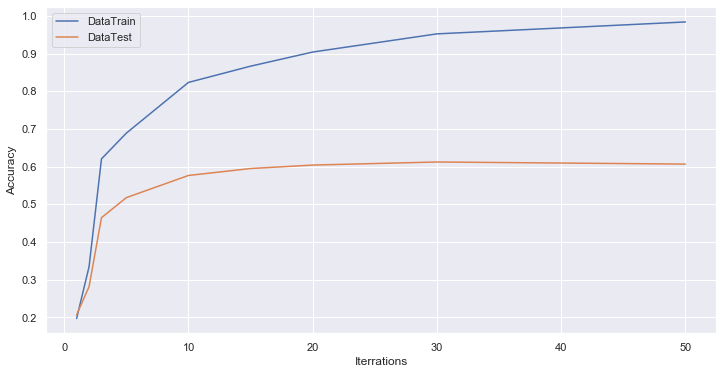

In [94]:
plt.subplots(1,1,figsize=(12,6))
plt.plot(liste_nb_iter, acc_train , label='DataTrain')
plt.plot(liste_nb_iter, acc_test , label='DataTest')


plt.ylabel("Accuracy")
plt.xlabel('Iterrations')
plt.legend()
plt.show()

In [95]:
liste_nb_hl = [1,2,3,5,10,20,50]
acc_train = []
acc_test = []
for nbhl in liste_nb_hl:
    print(nbhl)
    clf = MLPClassifier(random_state=1, max_iter=20, hidden_layer_sizes=nbhl,alpha=0.1).fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    y_pred_test = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test,y_pred_test))


1


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


10


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


20


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


50


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


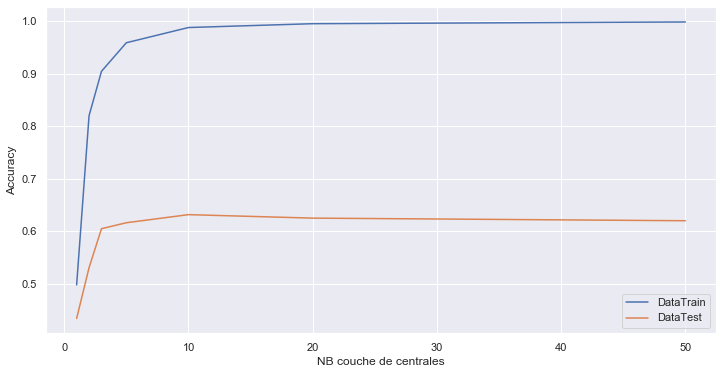

In [96]:
plt.subplots(1,1,figsize=(12,6))
plt.plot(liste_nb_hl, acc_train , label='DataTrain')
plt.plot(liste_nb_hl, acc_test , label='DataTest')


plt.ylabel("Accuracy")
plt.xlabel('NB couche de centrales')
plt.legend()
plt.show()

In [97]:
liste_a = [1e-5,1e-3,0.1,0.5,1,3,10]
acc_train = []
acc_test = []
for a in liste_a:
    print(a)
    clf = MLPClassifier(random_state=1, max_iter=20, hidden_layer_sizes=5,alpha=a).fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    y_pred_test = clf.predict(X_test)
    acc_test.append(accuracy_score(y_test,y_pred_test))

1e-05


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.001


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.1


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


10


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
np.log(np.array(liste_a))

array([-11.51292546,  -6.90775528,  -2.30258509,  -0.69314718,
         0.        ,   1.09861229,   2.30258509])

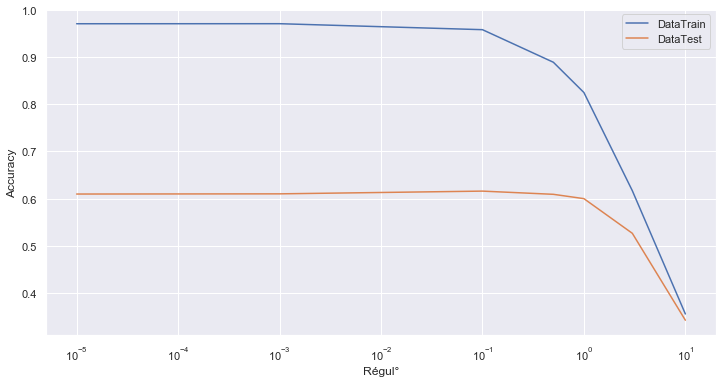

In [99]:
plt.subplots(1,1,figsize=(12,6))
plt.plot(liste_a, acc_train , label='DataTrain')
plt.plot(liste_a, acc_test , label='DataTest')


plt.ylabel("Accuracy")
plt.xlabel('Régul°')
plt.xscale('log')
plt.legend()
plt.show()

# Neighboor Model

In [100]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.2332


# Random Forest

In [101]:
for i in range (len(X_test[:300])):
    try:
        clf.predict(X_test[i:i+1])
    except :
        print(i)

158
160


KeyboardInterrupt: 

In [ ]:
clf.predict(np.array(X_test.iloc[0]).reshape(1, -1))

In [ ]:
X_test[0:1]

# MultinomialNB

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score
clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred_train = clf.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train)

accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy:',accuracy)

Accuracy: 0.8911


In [105]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

#accuracy_score(y_train,y_pred_train)
print('Accuracy:', accuracy_score(y_test,y_pred_test))

Accuracy: 0.6114


In [108]:
f1_score(y_train,y_pred_train,average='macro')

0.8902767745459188

In [109]:
f1_score(y_train,y_pred_train,average='weighted')

0.8903764597165317

In [111]:
f1_score(y_test, y_pred_test,average='macro')

0.6018371855086609

In [112]:
f1_score(y_test, y_pred_test,average='weighted')

0.60074546795926

# reseau neuronne monocouche

In [121]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=25, hidden_layer_sizes=15,alpha=0.1).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [122]:
accuracy_score(y_train,y_pred_train)

0.9951

In [123]:
f1_score(y_train,y_pred_train,average='weighted')

0.9950970848232887

In [124]:
f1_score(y_train,y_pred_train,average='macro')

0.9950853228551019

In [125]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.6254

In [126]:
f1_score(y_test, y_pred_test,average='macro')

0.624457648132509

In [127]:
f1_score(y_test, y_pred_test,average='weighted')

0.6230749232686957

In [120]:
# SVC

In [128]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.9985

In [129]:
f1_score(y_train,y_pred_train,average='weighted')

0.998499761528955

In [130]:
f1_score(y_train,y_pred_train,average='macro')

0.9984960098855569

In [131]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.6082

In [132]:
f1_score(y_test, y_pred_test,average='macro')

0.6060573709588424

In [133]:
f1_score(y_test, y_pred_test,average='weighted')

0.6045854257580011

In [23]:
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score

# Nearest neig

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf =  KNeighborsClassifier(n_neighbors=40,metric='cosine').fit(X_train, y_train)
y_pred_train = clf.predict(X_train)


In [21]:
accuracy_score(y_train,y_pred_train)

0.5081

In [22]:
f1_score(y_train,y_pred_train,average='macro')

0.5126338895358098

In [ ]:
f1_score(y_train,y_pred_train,average='weighted')

In [139]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.226

In [140]:
f1_score(y_test, y_pred_test,average='macro')

0.12894586304516092

In [141]:
f1_score(y_test, y_pred_test,average='weighted')

0.12832038450277547

# GAUSSIEN

In [ ]:
#trop long ( matrice cov)
from sklearn.gaussian_process import GaussianProcessClassifier
clf =  GaussianProcessClassifier().fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
accuracy_score(y_train,y_pred_train)

# Reg Log

In [26]:
from sklearn.linear_model import LogisticRegression
clf =  LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)

In [27]:
accuracy_score(y_train,y_pred_train)

0.9835

In [28]:
f1_score(y_train,y_pred_train,average='macro')

0.9834752629527056

In [29]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.621

In [30]:
f1_score(y_test,y_pred_test,average='macro')

0.6205035879171614